<a href="https://colab.research.google.com/github/sjdoescoding/CE802-Assignment/blob/main/CE802_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE802 - Comparative Study

# Part A

#Sections 

* Importing Libraries & Uploading the data
* Exploratory Data Analysis
* Feature Engineering / Preprocessing
* Initial Prediction/Performance of ML Procedures
* Prediction on a hold-out test set

In [135]:
#Importing Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


# Uploading the Dataset

df = pd.read_csv("/content/CE802_P2_Data.csv")



# Exploratory Data Analysis

In [136]:
# Getting the size of the dataset
init_size = df.shape
print("The initial size of the data: {}".format(init_size), '\n')

# A look into the variables
print(df.columns)

The initial size of the data: (1500, 16) 

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Class'],
      dtype='object')


In [137]:
# Initial look into the dataset
df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.76,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,NaN,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,NaN,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,NaN,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,NaN,True


We can see from an intial look into the dataset that feature F15 has NaN values in which will need to be addressed during the feature engineering.

In [138]:
# Checking for NaN values in F15 variable
df['F15'].isnull().sum()

750

There are 750 NaN values in F15, with this many NaN values it may be worth to drop the entire column if it negatively impacts the prediction of Diabetes.

In [139]:
# Checking datatypes
print(df.dtypes, '\n')

print('The number of datatypes for the features: ','\n', df.dtypes.value_counts())

F1       float64
F2       float64
F3         int64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10        int64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object 

The number of datatypes for the features:  
 float64    13
int64       2
bool        1
dtype: int64


In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,-4.569780,7.662813,-29.76,-10.2600,-7.560,2.9175,8.85
F2,1500.0,-20.474600,7.635517,-45.57,-26.1300,-23.445,-13.1100,-6.78
F3,1500.0,109.024667,117.334580,0.00,15.0000,50.000,195.0000,390.00
F4,1500.0,12.744707,2.217929,8.02,11.4400,12.440,13.9000,21.22
F5,1500.0,-6.248787,2.540644,-15.28,-8.1300,-7.230,-3.7700,-1.59
F6,1500.0,14.906280,12.975630,0.00,3.7200,6.210,24.6000,47.10
F7,1500.0,13.107813,3.166909,9.42,10.1400,10.500,15.8700,19.57
F8,1500.0,-42.256000,14.318630,-76.98,-56.9800,-34.980,-30.9800,-24.98
F9,1500.0,-557.610667,142.833748,-888.72,-678.7200,-486.720,-446.7200,-398.72
F10,1500.0,10.806667,9.009814,0.00,2.0000,2.000,20.0000,20.00


We can see that some features hold the value of 0, however, these will not be addressed due to not knowing the value of the feature inherently without testing. If the 0 values impact the accuracy of the accuracy then the dataset can be re-engineered in future experiments. 

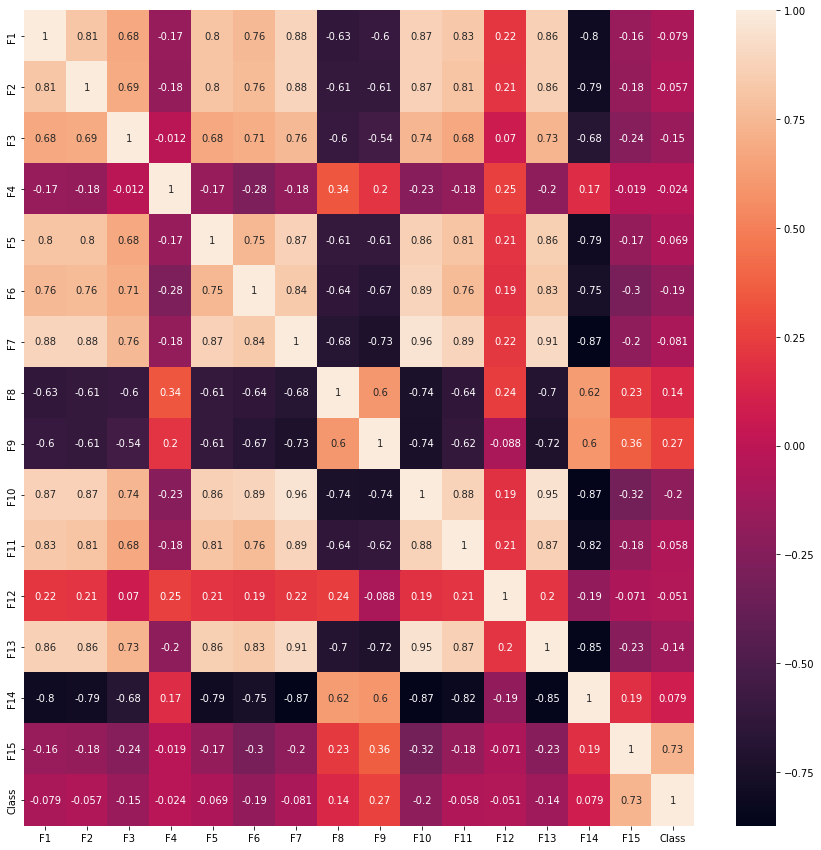

In [141]:
# Correlation heatmap of the features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cbar=True,annot=True)

#Feature Engineering / Preprocessing

From the dataset we can initially remove the F15 feature due to it's vast amount of Nan values.

In [142]:
# The size of the data before the 'F15' feature has been dropped
print("The size of the data before dropping 'F15' feature is : {} ".format(df.shape))

df = df.drop(columns = ['F15'], axis = 1) # Dropping 'F15' Column

print("The size of the data after dropping 'F15' feature is : {} ".format(df.shape))

The size of the data before dropping 'F15' feature is : (1500, 16) 
The size of the data after dropping 'F15' feature is : (1500, 15) 


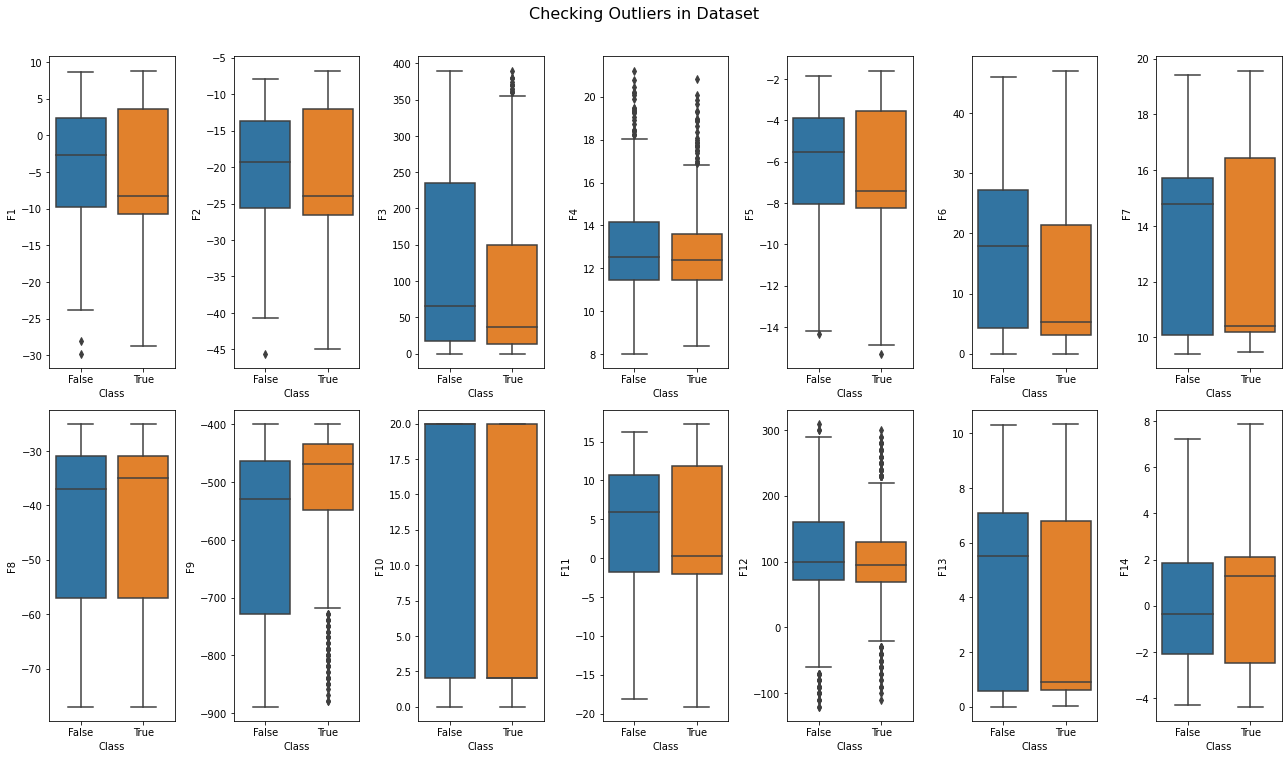

In [143]:
# Boxplots to see outliers in the dataset
fig, axes = plt.subplots(2,7, figsize = (18,10))

fig.suptitle('Checking Outliers in Dataset', y=1.05, fontsize = 16)

# Drawing the boxplots for each feature 
sns.boxplot(ax=axes[0,0], data=df, x = 'Class', y = 'F1')

sns.boxplot(ax=axes[0,1], data=df, x = 'Class', y = 'F2')

sns.boxplot(ax=axes[0,2], data=df, x = 'Class', y = 'F3')

sns.boxplot(ax=axes[0,3], data=df, x = 'Class', y = 'F4')

sns.boxplot(ax=axes[0,4], data=df, x = 'Class', y = 'F5')

sns.boxplot(ax=axes[0,5], data=df, x = 'Class', y = 'F6')

sns.boxplot(ax=axes[0,6], data=df, x = 'Class', y = 'F7')

sns.boxplot(ax=axes[1,0], data=df, x = 'Class', y = 'F8')

sns.boxplot(ax=axes[1,1], data=df, x = 'Class', y = 'F9')

sns.boxplot(ax=axes[1,2], data=df, x = 'Class', y = 'F10')

sns.boxplot(ax=axes[1,3], data=df, x = 'Class', y = 'F11')

sns.boxplot(ax=axes[1,4], data=df, x = 'Class', y = 'F12')

sns.boxplot(ax=axes[1,5], data=df, x = 'Class', y = 'F13')

sns.boxplot(ax=axes[1,6], data=df, x = 'Class', y = 'F14')

fig.tight_layout()
plt.show()


We can see from the boxplots that majority of the features do not have outliers, on the other hand, F3, F4, F9 and F12 all containing significant amounts of outliers which normally would need to be addressed. 

However, as the names of the labels are not given, I will not be removing the outliers as without apprropriate expert or prior knowledge I cannot determine whether these outliers will positively or negatively impact the learning algorithm - or if a given feature is highly important to determining diabetes.


# Prediction

Importing Machine Learning Models

In [144]:
# Importing ML models & Evaluators
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Modelling the Data


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assigning X and y values, dropping the 'Class' feature as it will not help for prediction on the test set.
X = df.drop('Class', axis = 1).to_numpy()
y = df['Class'].to_numpy()

# Scaling the dataset
standardScale = StandardScaler()
standardScale.fit_transform(X)

# Splitting the Data into Train and Test sets - 80:20 Split on the training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 0)

# GridSearch Hyper Tuning Parameters

In [146]:
# Creating dict for Decision Tree
params1= {'criterion' :('gini','entropy')}

In [147]:
# Creating dict for KNN
params2= {'n_neighbors' : [1,3,5,10]}

In [148]:
# GridsearchCV on DT
grid = GridSearchCV(DecisionTreeClassifier(), params1, scoring = 'accuracy')
grid.fit(X,y)
grid.best_params_

{'criterion': 'gini'}

In [149]:
# GridsearchCV on KNN
grid = GridSearchCV(KNeighborsClassifier(), params2, scoring = 'accuracy')
grid.fit(X,y)
grid.best_params_

{'n_neighbors': 5}

# Decision Tree 


Cross-Validation on Decision Tree


In [150]:
# Cross-Validation on DT

clf = DecisionTreeClassifier(criterion = 'gini')

scores = cross_val_score(clf, X,y, cv=5)

print("Decision Tree Cross-validation scores: ", scores)

print("Mean 5-Fold Accuracy: %0.2f \nVariance: (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Decision Tree Cross-validation scores:  [0.70333333 0.79333333 0.79       0.77666667 0.78      ]
Mean 5-Fold Accuracy: 0.77 
Variance: (+/- 0.07)


Decision Tree Prediction

In [151]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(criterion = 'gini')
tree.fit(X_train, y_train)

# Prediction
tree_y_pred = tree.predict(X_test)

# Prediction Score
tree_test_score = tree.score(X_test, y_test)
print('Prediction score: {:.2f} \n'.format(tree_test_score))

# Classification Report
print('Classification Report: \n', classification_report(y_test, tree_y_pred))

# Confusion Matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, tree_y_pred))


Prediction score: 0.76 

Classification Report: 
               precision    recall  f1-score   support

       False       0.76      0.80      0.78       160
        True       0.76      0.71      0.73       140

    accuracy                           0.76       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.76      0.76      0.76       300

Confusion Matrix: 
 [[128  32]
 [ 41  99]]


# Naive Bayes

Cross-Validation on Naive Bayes

In [152]:
# Cross-Validation on Naive Bayes

clf = GaussianNB()

scores = cross_val_score(clf, X,y, cv=5)

print("Naive Bayes Cross-validation scores: ", scores)

print("Mean 5-Fold Accuracy: %0.2f \nVariance: (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Bayes Cross-validation scores:  [0.61       0.63       0.56666667 0.57666667 0.61      ]
Mean 5-Fold Accuracy: 0.60 
Variance: (+/- 0.05)


Naive Bayes Prediction

In [153]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)

# Prediction
y_pred = NB.predict(X_test)

# Prediction Score
NB_test_score = NB.score(X_test, y_test)
print('Prediction score: {:.2f} \n'.format(NB_test_score))

# Classification Report
print('Classification Report: \n', classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Prediction score: 0.57 

Classification Report: 
               precision    recall  f1-score   support

       False       0.61      0.52      0.56       160
        True       0.53      0.63      0.58       140

    accuracy                           0.57       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.58      0.57      0.57       300

Confusion Matrix: 
 [[83 77]
 [52 88]]


# K-Nearest Neighbour

Cross-Validation on K-NN

In [154]:
clf = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(clf, X,y, cv=5)

print("Decision Tree Cross-validation scores: ", scores)

print("Mean 5-Fold Accuracy: %0.2f \nVariance: (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Decision Tree Cross-validation scores:  [0.68666667 0.66       0.63666667 0.61666667 0.59      ]
Mean 5-Fold Accuracy: 0.64 
Variance: (+/- 0.07)


K-NN Prediction

In [155]:
# Knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediction
y_pred = knn.predict(X_test)


# Prediction Score
knn_test_score = knn.score(X_test, y_test)
print('Prediction score: {:.2f} \n'.format(knn_test_score))


# Classification Report
print('Classification Report: \n', classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Prediction score: 0.60 

Classification Report: 
               precision    recall  f1-score   support

       False       0.62      0.62      0.62       160
        True       0.57      0.57      0.57       140

    accuracy                           0.60       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.60      0.60      0.60       300

Confusion Matrix: 
 [[100  60]
 [ 60  80]]


# Summary of Comparative Study Results

**Decision Tree**


*   Prediction: 0.77
*   CV-Accuracy: 0.76

**Naive Bayes**

*  Prediction: 0.57
* CV-Accuracy: 0.6

**K-Nearest Neighbors**
* Prediction: 0.6
* CV-Accuracy: 0.64

From the results of the Comparative study, we can see that Decision had the best predictor from the dataset that the model was trained on. Moreover, the DT model performed best when cross-validation was performed on the dataset.

Likewise, Naive Bayes Classifier and K-Nearest Neighbors performed similar to each other, in that they both had similar prediction scores and CV accuracies.

Therefore, as the best performing learning algorithm, the trained Decision Tree model will be used to test the hold-out test set.

# Part B

# Prediction on a hold-out test Set

In [156]:
# Uploading the dataset
df_test = pd.read_csv("/content/CE802_P2_Test.csv")

# Removing the 'F15' Feature
df2 = df_test.drop('F15', axis = 1)

df2.shape

(1500, 15)

In [157]:
# Assigning X and y values, dropping the 'Class' feature as it will not help for prediction on the new test set.
X2 = df2.drop('Class', axis = 1).to_numpy()

# Scaling the new dataset
standardScale = StandardScaler()
standardScale.fit_transform(X2)

array([[-0.56548672, -0.68387528, -0.76049404, ..., -0.62212444,
        -1.06637481,  1.50751512],
       [-0.51811588, -1.15583799, -0.85523426, ..., -0.40451387,
        -1.12747188,  0.50273008],
       [ 0.46482896, -0.64877061,  0.00604041, ..., -1.61346147,
         0.53960551, -0.75918498],
       ...,
       [-2.11293402, -1.25725147, -0.82939602, ...,  0.03070727,
        -0.99654958,  0.48295085],
       [-0.4115315 , -0.80479134, -0.863847  , ..., -0.21108225,
        -1.0489185 ,  0.72821334],
       [ 1.31355643,  0.91533723,  1.34101613, ...,  1.28801278,
         0.37958935, -1.20619565]])

In [158]:
# Using the already trained DT model on the new test set
tree_y_pred2 = tree.predict(X2)

# Checking that prediction has worked
print(tree_y_pred2)

# Converting the test set to a dataframe and adding a 'Class' label to the former test set
df3 = pd.DataFrame(df2)
df3['Class'] = tree_y_pred2

df3

[False False  True ...  True  True  True]


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,-8.67,-25.56,21,13.14,-7.45,5.55,10.29,-30.98,-476.72,2,-1.17,61.66,0.23,3.76,False
1,-8.31,-29.19,10,12.16,-7.66,5.22,10.22,-30.98,-422.72,2,-0.96,79.66,0.02,1.22,False
2,-0.84,-25.29,110,12.34,-3.72,20.70,17.32,-76.98,-778.72,20,11.10,-20.34,5.75,-1.97,True
3,0.90,-14.94,120,9.44,-3.44,28.05,15.52,-56.98,-858.72,20,6.33,229.66,8.05,-1.77,False
4,-0.33,-9.60,345,14.26,-3.32,34.80,15.07,-36.98,-458.72,20,12.18,129.66,9.80,-2.17,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2.07,-12.18,55,9.10,-3.70,17.40,15.72,-66.98,-838.72,20,2.58,89.66,7.45,-1.42,False
1496,-8.73,-28.92,20,14.86,-7.81,5.01,9.84,-34.98,-470.72,2,-2.55,85.66,0.02,1.75,True
1497,-20.43,-29.97,13,13.58,-7.32,1.35,10.05,-30.98,-416.72,2,-4.02,115.66,0.47,1.17,True
1498,-7.50,-26.49,9,14.08,-7.28,2.79,10.50,-30.98,-414.72,2,-2.28,95.66,0.29,1.79,True


In [159]:
# Creating new CSV
df3.to_csv('CE802_P2_Test2.csv')